In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
# import fft
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import juno
import numpy as np
from LightPipes import *
from matplotlib import pyplot as plt
from juno.structures import SimulationStage
from juno.Lens import Lens
from juno.Simulation import generate_sq_freq_arr, propagate_over_distance
from scipy import fftpack

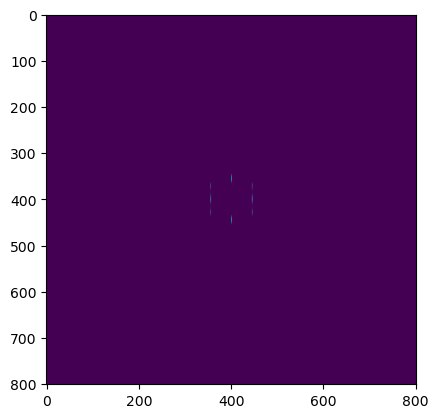

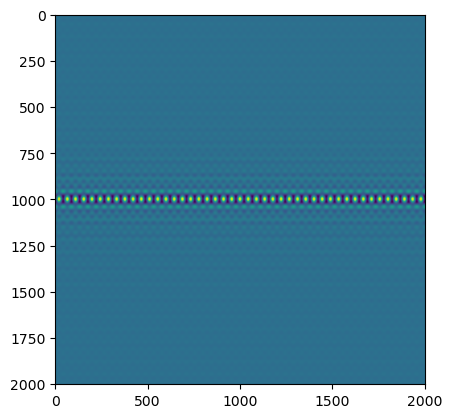

In [95]:
with open(r"C:\Users\Dadie1\Downloads\Maskintensity.pkl", "rb") as f:
    data = pickle.load(f).T

with open(r"C:\Users\Dadie1\Downloads\Maskintensity.pkl", "rb") as f:
    LLS_ideal_pupil = pickle.load(f).T

with open(r"C:\Users\Dadie1\Downloads\EField.pkl", "rb") as f:
    Efield = pickle.load(f)


# pad LLS_ideal_pupil to 2001x2001 px
LLS_ideal_pupil = np.pad(LLS_ideal_pupil, 600, mode="constant", constant_values=0)

plt.imshow(data)
plt.show()

plt.imshow(Efield)


In [27]:
def calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height, realspace_x, realspace_y):
    rounded_output, propagation = propagate_over_distance(
        fft_wavefront, distance, freq_arr, wavenumber
    )
    
    plt.imshow(np.abs(rounded_output), cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
    # label x axis
    plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
    plt.xlabel("x/λ")
    # label y axis
    plt.ylabel("z/λ")
    # print(np.mean(rounded_output[np.shape(rounded_output)[0]//2, :]))
    # print(np.mean(rounded_output[rounded_output.shape[1]//2, :])/3.188232349535555e-09)
    plt.colorbar()
    plt.show()

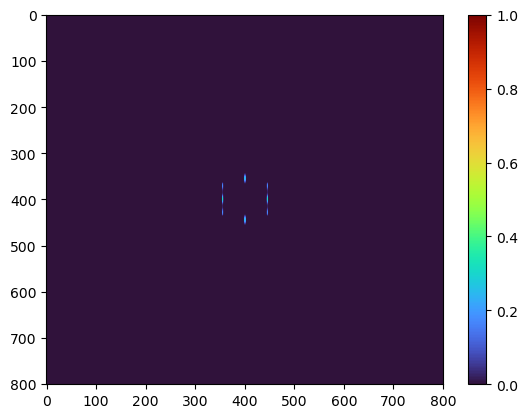

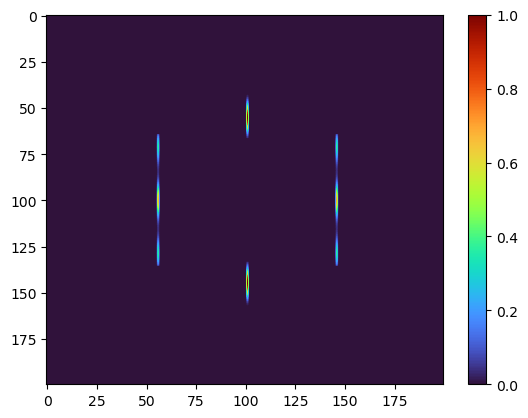

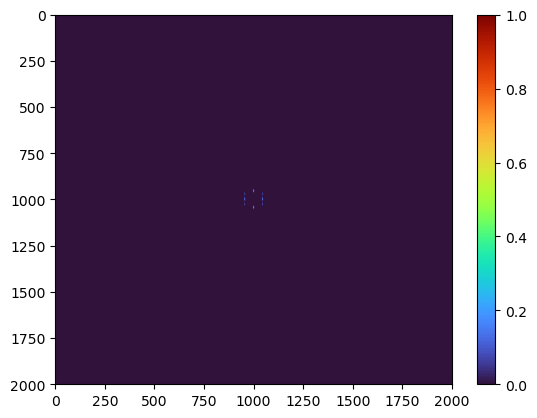

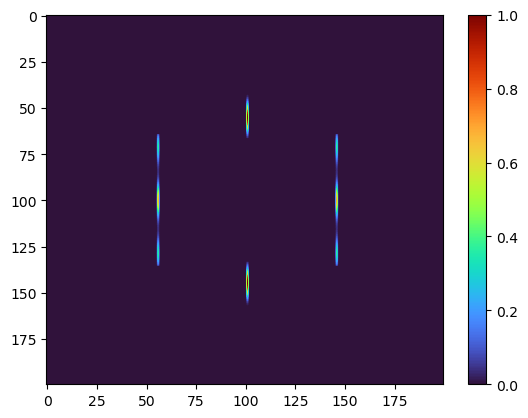

In [97]:
plt.imshow(data, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(data[300:500, 300:500], cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()


plt.imshow(LLS_ideal_pupil, cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(LLS_ideal_pupil[900:1100, 900:1100], cmap="turbo", aspect="auto")
plt.colorbar()
plt.show()


In [60]:
#plot fourier transform
fft_data = fftshift(ifft2(data))
fft_data_intensity = np.abs(fft_data)

LLS_complex_electric_field = fftshift(ifft2(LLS_ideal_pupil))
LLS_abs_electric_field = np.abs(LLS_complex_electric_field)
LLS_intensity = LLS_abs_electric_field ** 2

# normalise LLS intensity from 0 to np.pi
LLS_intensity = LLS_intensity / np.max(LLS_intensity) * np.pi
LLS_abs_electric_field = LLS_abs_electric_field / np.max(LLS_abs_electric_field) * np.pi


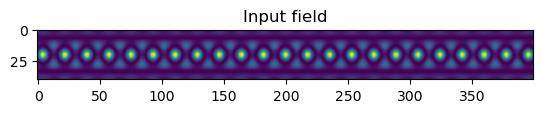

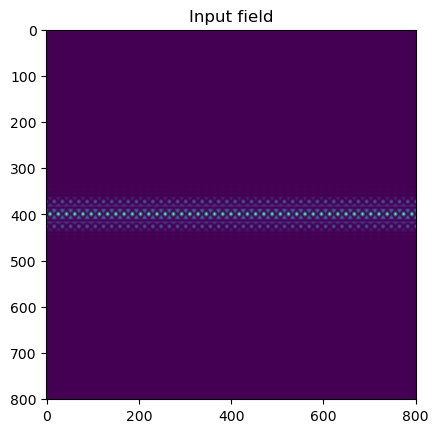

In [7]:
field = fft_data
wavelength = 488e-9
pixel_size = 200*wavelength / 800
# print(pixel_size)
distance = 2 * wavelength
grid_dimension = field.shape[0]
grid_size = grid_dimension * pixel_size
Field = Begin(grid_size, wavelength, grid_dimension)
Field.field = field
I_Field = Intensity(0, Field)
center_y = Field.field.shape[0]// 2
center_x = Field.field.shape[1]// 2
plt.imshow(I_Field[center_y-20:center_y+20, center_x-200:center_x+200])
plt.title("Input field")
plt.show()

plt.imshow(I_Field)
plt.title("Input field")
plt.show()


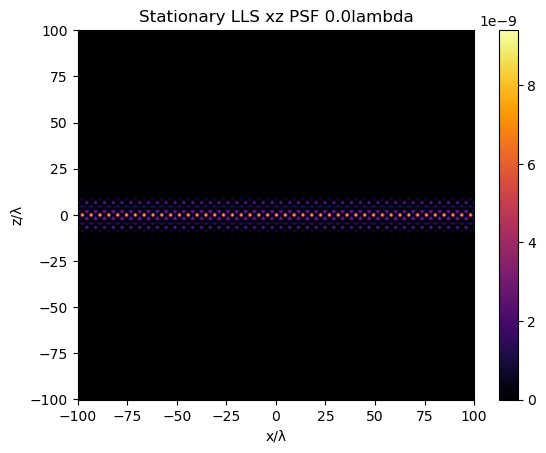

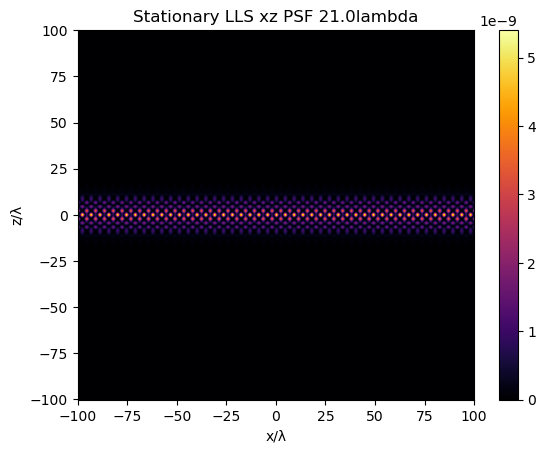

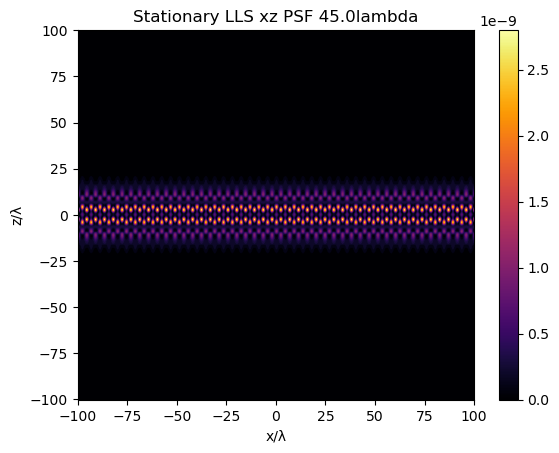

In [88]:
width = 400
height = 100
wavelength = 488e-9
cmap = "inferno"
pixel_size = wavelength / 4
n = 1.
wavenumber = 2 * np.pi / wavelength / n
fft_wavefront = fftshift(fftpack.fft2((fft_data)))

realspace_x = fft_data.shape[0] * pixel_size * n / wavelength
realspace_y = fft_data.shape[1] * pixel_size * n / wavelength

freq_arr = generate_sq_freq_arr(fft_data, pixel_size)

distance = 0*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height, realspace_x, realspace_y)
distance = 21*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height, realspace_x, realspace_y)
distance = 45*wavelength
calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, pixel_size, wavelength, n, cmap, width, height, realspace_x, realspace_y)

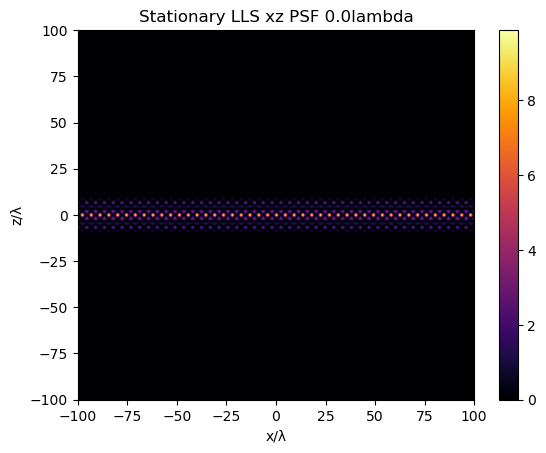

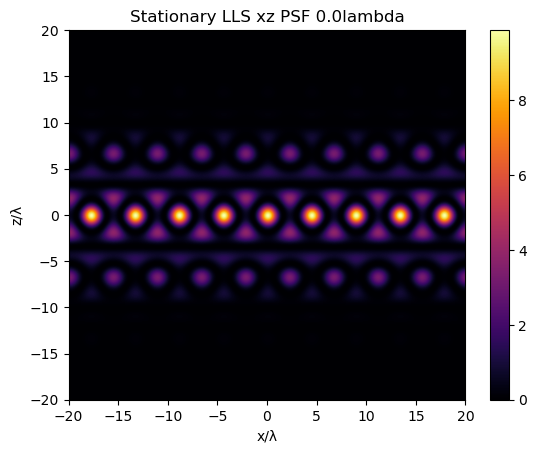

In [89]:
wavelength = 1
pixel_size = 0.1

distance = 0 * wavelength
wavenumber = 2 * np.pi / wavelength
cmap="inferno"

realspace_x = LLS_intensity.shape[0] * pixel_size
realspace_y = LLS_intensity.shape[1] * pixel_size

# fft_wavefront_intensity = np.fft.fft2(LLS_intensity)
# freq_arr_intensity = generate_sq_freq_arr(LLS_intensity, pixel_size)

# rounded_output_intensity, propagation = propagate_over_distance(
#     fft_wavefront_intensity, distance, freq_arr_intensity, wavenumber
# )
    
# plt.imshow(np.abs(rounded_output_intensity)[800:1200, 800:1200], cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
# plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
# plt.xlabel("x/λ")
# plt.ylabel("z/λ")
# plt.colorbar()
# plt.show()

fft_wavefront_abs = np.fft.fft2(LLS_abs_electric_field)
freq_arr_abs = generate_sq_freq_arr(LLS_abs_electric_field, pixel_size)

rounded_output_abs, propagation = propagate_over_distance(
    fft_wavefront_abs, distance, freq_arr_abs, wavenumber
)
    
plt.imshow(np.abs(rounded_output_abs), cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
plt.xlabel("x/λ")
plt.ylabel("z/λ")
plt.colorbar()
plt.show()

realspace_x = 400 * pixel_size
realspace_y = 400 * pixel_size

plt.imshow(np.abs(rounded_output_abs)[800:1200, 800:1200], cmap=cmap, aspect="auto", extent=[-realspace_x/2, realspace_x/2, -realspace_y/2, realspace_y/2])
plt.title("Stationary LLS xz PSF {}lambda".format(distance/wavelength))
plt.xlabel("x/λ")
plt.ylabel("z/λ")
plt.colorbar()
plt.show()